## Assignment 1

#### Question 1

The first task is about the normal equation in linear regression.

The normal equation is the formula that provides a methode to calcule the regression coefficients for a linear regression as an elternative to using trial-and-error or iterative methods.

Source for explaination:

https://www.geeksforgeeks.org/machine-learning/ml-normal-equation-in-linear-regression/

In [2]:
import numpy as np

#stop that annoying e printout thing
#np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

observations = np.array([
    [100, 18.2],
    [200, 36.8],
    [300, 54.1],
    [400, 73.5],
    [500, 91.2],

])
xData = observations[:, 0]
yData = observations[:, 1]

X = np.column_stack((np.ones(len(xData)), xData))
y = yData.reshape(-1, 1)

print("(a) Design matrix X:")
print(X)
print("\n The Response vector y:")
print(y)

##Part 2
# Finding the gram matrix:
print("Part c)")
#For solving the normal equations we can use np.linalg solve of find python code for Cramer's rule online.

XTX = X.transpose() @ X
XTy = X.transpose() @ y



print(f"\033[1mXᵀ X\033[0m yields {XTX}")  # Using ᵀ instead of ²
print("And then")
print(f"\033[1mXᵀ y\033[0m yields {XTy}")

#The capital letter for theta is \u0398 and hat \u0302
#then \hat{\theta} = \u0398\u0302

try:
    thetaHat = np.linalg.solve(XTX, XTy)
except np.linalg.LinAlgError:
    print(f"Computation of \033[1mX\u00b2 X\033[0m yields error")



print("a theta with hat\u0398\u0302")


print(f"\u03b8\u0302 = (\033[1mXᵀ X\033[0m)⁻¹ (\033[1mXᵀ y\033[0m) = {thetaHat}")

#subscript 0 in python is \u2080
#subscipt 1 in puthon is \u2081
print(f"\u0398\u0302\u2080 = {thetaHat[0]}")
print(f"\u0398\u0302\u2081 = {thetaHat[1]}")


print(f"Part d")

predictedY = thetaHat[0] + (thetaHat[1] * xData)

# Residuals is error between the correct data and the data our model yields

residuals = yData - predictedY

print("The predicted Y is:")
print(predictedY)

print("The residuals is:")
print(residuals)

# root mean squared error maybe?
RMSR = np.sqrt(sum([error**2 for error in residuals])/len(residuals))

print(f"RMSR = {RMSR}")



print("Comment on the model fit quality:")
print(f"The model worked the best for predicting the first and the last datapoint.")
print("There is no obvious pattern in the residual data that suggests any type of BIAS, other that that.")



(a) Design matrix X:
[[  1. 100.]
 [  1. 200.]
 [  1. 300.]
 [  1. 400.]
 [  1. 500.]]

 The Response vector y:
[[18.2]
 [36.8]
 [54.1]
 [73.5]
 [91.2]]
Part c)
Xᵀ X yields [[5.0e+00 1.5e+03]
 [1.5e+03 5.5e+05]]
And then
Xᵀ y yields [[   273.8]
 [100410. ]]
a theta with hatΘ̂
θ̂ = (Xᵀ X)⁻¹ (Xᵀ y) = [[-0.05 ]
 [ 0.183]]
Θ̂₀ = [-0.05]
Θ̂₁ = [0.183]
Part d
The predicted Y is:
[18.22 36.49 54.76 73.03 91.3 ]
The residuals is:
[-0.02  0.31 -0.66  0.47 -0.1 ]
RMSR = 0.39064049969249487
Comment on the model fit quality:
The model worked the best for predicting the first and the last datapoint.
There is no obvious pattern in the residual data that suggests any type of BIAS, other that that.


#### Question 2A (Feature engineering and polynomial models)
Using these sources:

https://data36.com/polynomial-regression-python-scikit-learn/

https://medium.com/@heyamit10/polynomial-regression-from-scratch-in-python-3c96a801d992

strainX: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
theta for the linear regression:
[[ 9.22 ]
 [12.789]]

Design matrix X:
[[1.   0.5  0.25]
 [1.   1.   1.  ]
 [1.   1.5  2.25]
 [1.   2.   4.  ]
 [1.   2.5  6.25]
 [1.   3.   9.  ]]

Response vector y: [12.1 22.8 31.2 37.5 41.8 44.2]


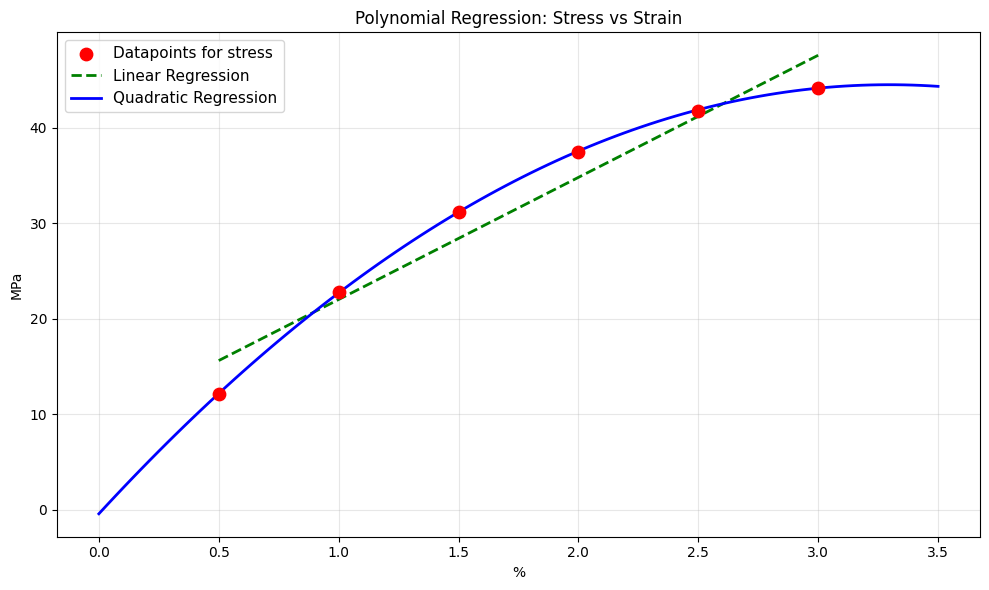

Problem 2c answer:
The parameter estimates  (theta coeffecients) are the following 
Θ̂₀ = -0.43
Θ̂₁ = 27.26
Θ̂₂ = -4.14


In [3]:


import numpy as np
import matplotlib.pyplot as plt

strainX = [ind/2 for ind in range(1,7)] 
print("strainX:", strainX)
stressY = np.array([12.1, 22.8, 31.2, 37.5, 41.8, 44.2])
strainX = np.array(strainX)
X = np.column_stack([np.ones_like(strainX), strainX, strainX**2])

# Making a linear line for comparision
XlinReg = np.column_stack((np.ones(len(strainX)), strainX))
ylinReg = stressY.reshape(-1, 1)
XTX_lin = XlinReg.T @ XlinReg
XTy_lin = XlinReg.T @ ylinReg
thetaHat = np.linalg.solve(XTX_lin, XTy_lin)
print("theta for the linear regression:")
print(thetaHat)
linRegPrediction = XlinReg @ thetaHat



print("\nDesign matrix X:")
print(X)
print("\nResponse vector y:", stressY)
y = np.array(stressY).reshape(-1, 1)

theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
xCurve = np.linspace(min(strainX) - 0.5, max(strainX) + 0.5, 100)  

XCurve = np.column_stack([np.ones_like(xCurve), xCurve, xCurve**2])

# Predicting y values for the curve we are goint to plot
yCurve = XCurve @ theta
plt.figure(figsize=(10, 6))


plt.scatter(strainX, stressY, color='red', s=80, label='Datapoints for stress', zorder=5)


plt.plot(strainX, linRegPrediction, 'g--', linewidth=2, label='Linear Regression')


plt.plot(xCurve, yCurve, 'b-', linewidth=2, label='Quadratic Regression')
plt.xlabel('%')
plt.ylabel('MPa')
plt.title('Polynomial Regression: Stress vs Strain')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Problem 2c answer:")
# THe
print(f"The parameter estimates  (theta coeffecients) are the following ")
print(f"\u0398\u0302\u2080 = {round(theta[0][0],2)}")
print(f"\u0398\u0302\u2081 = {round(theta[1][0],2)}")
print(f"\u0398\u0302\u2082 = {round(theta[2][0],2)}")

#### Question 2b

Polynomial regression is an extension of the linear regression, done by adding higher-degree terms.

Although we have a non-linear higher order term, the coefficients is basically found with the same linear operations as is used for normal linear regression which is the following:

$$
X^TX \hat{\theta} = X^Ty
$$

Plotting the purley linear regression model and the polynomyal regression  model next to each other will also show a very linear relationship, especially relative to the nonlinear regression model which is the following:

$$
y = \theta_1 (1-e^{- \theta_2 x})
$$

Sources used:

https://medium.com/@heyamit10/polynomial-regression-vs-linear-regression-3132dcef520f

https://en.wikipedia.org/wiki/Polynomial_regression

#### Question 2d (Text answer part)

The polynomial regression clearly yields a better path following result, for this scenario where the datapoints yields a constantly curving trajectory. This can be seen in the plot above.

### Question 3 ()Gradient descent implementation

x=[1 2 3 4]
y=[3 5 7 9]
After 1000 iterations:
theta0 = 0.894403
theta1 = 2.035916


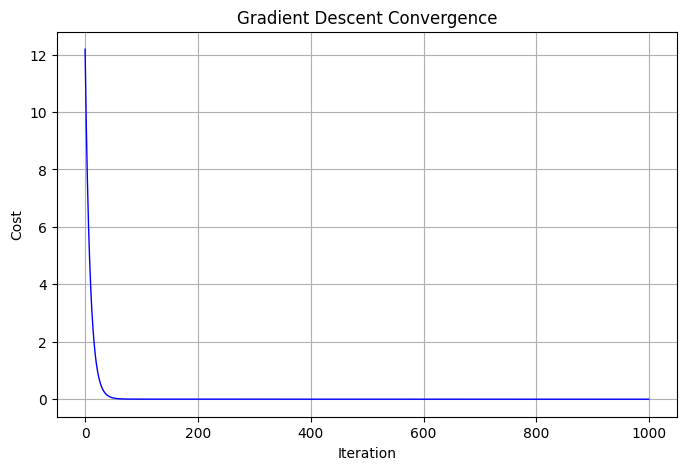

Part e)
Analytical comparioson of the solution:
The Analytical solution, which comes by using normal equations yields:
theta0 = 1.0
theta1 = 2.0
Difference (GD - Analytical):
Δtheta0 = -0.10559657780389853
Δtheta1 = 0.03591571360600687


In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Sources used during implementation:
#https://www.geeksforgeeks.org/machine-learning/ml-normal-equation-in-linear-regression/

# for-loop where we only want odd numbers:
# https://stackoverflow.com/questions/46104251/is-this-code-for-a-for-loop-odd-numbers-generator-in-python-valid
yData = np.array([x for x in range(3,  10, 2)])
xData = np.array([x for x in range(1,  5)])
m = len(y)
print(f"x={xData}")
print(f"y={yData}")

alpha = 0.01
iterations = 1000

theta0 = 0.0
theta1 = 0.0

JHistory = []

# Gradient Descent
for i in range(iterations):
    predictions = theta0 + theta1 * xData
    error = predictions - yData

    dJ_dtheta0 = (1/m) * np.sum(error)
    dJ_dtheta1 = (1/m) * np.sum(error * xData)

    theta0 -= alpha * dJ_dtheta0
    theta1 -= alpha * dJ_dtheta1

    J = (1/(2*m)) * np.sum((theta0 + theta1 * xData - yData)**2)
    JHistory.append(J)

print(f"After {iterations} iterations:")
print(f"theta0 = {theta0:.6f}")
print(f"theta1 = {theta1:.6f}")

plt.figure(figsize=(8, 5))
plt.plot(range(iterations), JHistory, 'b-', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.show()




print(f"Part e)")


print(f"Analytical comparioson of the solution:")

X = np.column_stack([np.ones_like(xData), xData])
thetaAnalytical = np.linalg.inv(X.T @ X) @ (X.T @ yData)


print("The Analytical solution, which comes by using normal equations yields:")
print(f"theta0 = {thetaAnalytical[0]}")
print(f"theta1 = {thetaAnalytical[1]}")

print("Difference (GD - Analytical):")
print(f"Δtheta0 = {theta0 - thetaAnalytical[0]}")
print(f"Δtheta1 = {theta1 - thetaAnalytical[1]}")



### Question 4 Brute force optimization and parameter landscapes

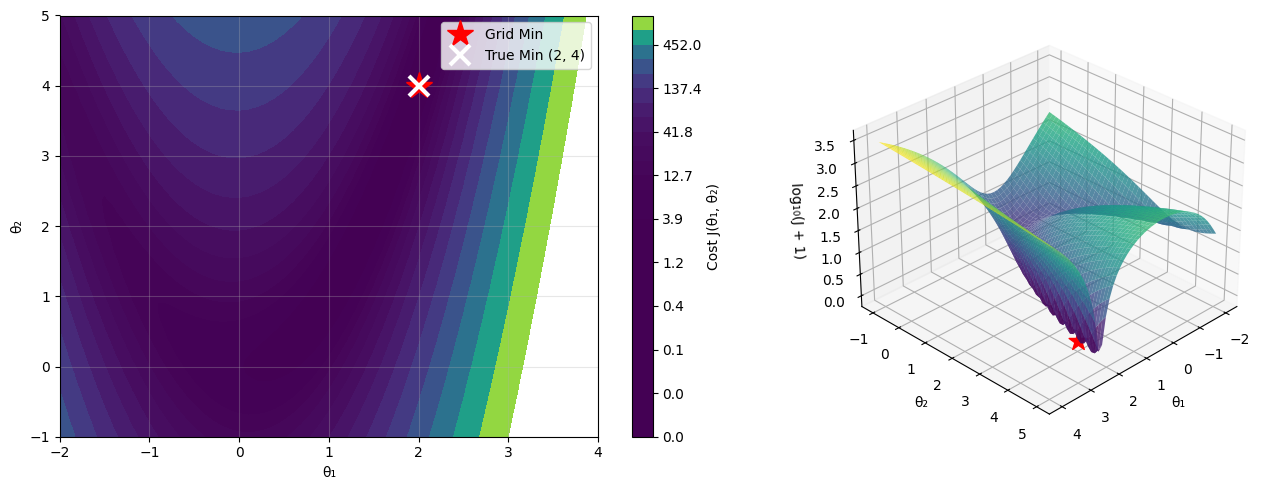

(np.float64(-2.0), np.float64(-1.0))
(np.float64(-2.0), np.float64(-0.9))
(np.float64(-2.0), np.float64(-0.8))
(np.float64(-2.0), np.float64(-0.7000000000000001))
(np.float64(-2.0), np.float64(-0.6000000000000001))
(np.float64(-2.0), np.float64(-0.5000000000000001))
(np.float64(-2.0), np.float64(-0.40000000000000013))
(np.float64(-2.0), np.float64(-0.30000000000000016))
(np.float64(-2.0), np.float64(-0.20000000000000018))
(np.float64(-2.0), np.float64(-0.1000000000000002))
(np.float64(-2.0), np.float64(-2.220446049250313e-16))
(np.float64(-2.0), np.float64(0.09999999999999964))
(np.float64(-2.0), np.float64(0.19999999999999973))
(np.float64(-2.0), np.float64(0.2999999999999998))
(np.float64(-2.0), np.float64(0.3999999999999997))
(np.float64(-2.0), np.float64(0.49999999999999956))
(np.float64(-2.0), np.float64(0.5999999999999996))
(np.float64(-2.0), np.float64(0.6999999999999997))
(np.float64(-2.0), np.float64(0.7999999999999996))
(np.float64(-2.0), np.float64(0.8999999999999995))
(np.f

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Range from -2 to 4 with step size of 0.1
theta1 = np.arange(-2, 4.1, 0.1)
#range from -1 to 5 with step size 0.1
theta2 = np.arange(-1, 5.1, 0.1)



# THIS IS THE COST FUNCTION
def J(theta1, theta2):
    return (theta1 - 2)**2 + 10 * (theta2 - theta1**2)**2

minCost = float('inf')
bestT1, bestT2 = None, None

for t1 in theta1:
    for t2 in theta2:
        cost = J(t1, t2)
        if cost < minCost:
            minCost = cost
            bestT1 = t1
            bestT2 = t2

# Prepare grid for plotting
T1Grid, T2Grid = np.meshgrid(theta1, theta2)
ZGrid = J(T1Grid, T2Grid)

# Create figure with subplots
fig = plt.figure(figsize=(14, 5))

# Left: Contour plot
ax1 = fig.add_subplot(121)
levels = np.logspace(-2, 3, 30)
contour = ax1.contourf(T1Grid, T2Grid, ZGrid, levels=levels, cmap='viridis')
plt.colorbar(contour, ax=ax1, label='Cost J($\theta_1$, $\theta_2$)')
ax1.plot(bestT1, bestT2, 'r*', markersize=20, label=f'Grid Min')
ax1.plot(2, 4, 'wx', markersize=15, mew=3, label='True Min (2, 4)')
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r'$\theta_2$')
#ax1.setTitle('Q4: Cost Function Contours')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right: 3D surface
ax2 = fig.add_subplot(122, projection='3d')
t1_fine = np.linspace(-2, 4, 50)
t2_fine = np.linspace(-1, 5, 50)
T1_fine, T2_fine = np.meshgrid(t1_fine, t2_fine)
Z_fine = J(T1_fine, T2_fine)
ax2.plot_surface(T1_fine, T2_fine, np.log10(Z_fine + 1), cmap='viridis', alpha=0.8)
ax2.scatter([bestT1], [bestT2], [np.log10(minCost + 1)], c='red', s=200, marker='*', label='Grid Min')
ax2.set_xlabel(r'$\theta_1$')
ax2.set_ylabel(r'$\theta_2$')
ax2.set_zlabel('log₁₀(J + 1)')
#ax2.setTitle('3D Cost Surface')
ax2.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()


import time

# Grid search timing (already computed but recalc for accuracy)
startGrid = time.perf_counter()
minCostGrid = float('inf')
bestGrid = (0, 0)
for t1 in theta1:
    for t2 in theta2:
        cost = J(t1, t2)
        if cost < minCostGrid:
            minCostGrid = cost
            bestGrid = (t1, t2)
            print(bestGrid)
grid_time = time.perf_counter() - startGrid

# Gradient descent
def gradient_descent(x, y, alpha=0.01, iterations=1000):
    m = len(y)
    theta0, theta1 = 0.0, 0.0
    cost_history = []
    theta0_hist, theta1_hist = [theta0], [theta1]

    for i in range(iterations):
        # Predictions and errors
        predictions = theta0 + theta1 * x
        errors = predictions - y

        # Gradients
        grad_theta0 = (1/m) * np.sum(errors)
        grad_theta1 = (1/m) * np.sum(errors * x)

        # Simultaneous update
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1

        cost_history.append(cost_function(theta0, theta1, x, y))
        theta0_hist.append(theta0)
        theta1_hist.append(theta1)

    return theta0, theta1, cost_history, theta0_hist, theta1_hist

t1Gd, t2Gd, cost_hist, theta0_hist, theta1_hist  = gradient_descent()

print(f"Grid Search:")
print(f"  Time: {grid_time:.4f} s")
print(f"  Evaluations: {len(theta1)*len(theta2)}")

#### Question 4d) When is brute force preferable:


The brute force approach is often considered the simplest and most straight forward way to solve a problem.
The Brute-force would systematically check/trying all of the possible candidates for if they satisfies the problem statement.

In programming terms, this often  means to iterate through all potential inputs or combinations to find a result.

The algorithm can take a long time to run, but it insures correctness because it isnt easily fooled by a difficult optimization enviorment.

sources:
https://medium.com/@logic3110/mastering-problem-solving-the-underrated-power-of-brute-force-algorithms-c8cadb980a52
https://en.wikipedia.org/wiki/Brute-force_search



#### Question 5A (Non-linear least squares (BOD Model))

Part a)
The time series we are working with:
[1, 2, 3, 4, 5, 7]


AttributeError: 'Axes' object has no attribute 'setTitle'

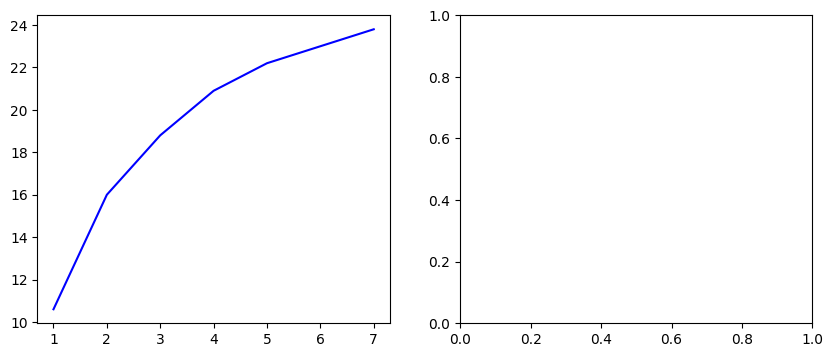

In [1]:
import matplotlib.pyplot as plt
import numpy as np

print("Part a)")
time = list(range(1, 8)) # makes list with numbers from 1 to 7
time.remove(6)
print("The time series we are working with:")
print(time)
BODy = [10.6, 16.0, 18.8, 20.9, 22.2, 23.8]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1.plot(time, BODy, 'b-')

ax1.setTitle('Datapoints at time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.grid(True)

ax2.grid(True)
eulersNum = [(1-np.exp((-0.4)*t)) for t in time]
ax2.plot(time, eulersNum, 'r--')
ax2.setTitle('Trajectory of 1 - exp(-1*t)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')

plt.show()


##### Text answer for Question 5a)

We can see that the trajectory to the datapoints over time looks very simular to the trajectory of 1-exp(-2t), which happens to be the function that Non-linear least squares are based uppon.

Therefor the BOD model looks very good for constructing a prdiction model for this dataset.





#####  Question 5b)
Implement parameter estimation using scipy.optimize.minimize with initial guess $\theta_1=25$, $\theta_2=0.5$

In [7]:
import scipy as sc
import numpy as np
#Implement
time = np.array(list(range(1, 8)))
time = np.delete(time, -2)

BOD = np.array([10.6, 16.0, 18.8, 20.9, 22.2, 23.8])

print(time)
print(BOD)

initGsThet = [25, 0.5]
#documentation:
# https://docs.scipy.org/doc/scipy-1.16.2/reference/generated/scipy.optimize.minimize.html
#sc.optimize.minimize


# Objective function
def objective(params, t, y):
    theta1, theta2 = params
    y_pred = theta1 * (1 - np.exp(-theta2 * t))
    return np.sum((y_pred - y) ** 2)

# Optimize
# With 1st initual guess
result1 = sc.optimize.minimize(objective, initGsThet, args=(time, BOD))



# Results
print(f"Optimized theta1 ={result1.x[0]} and theta2 ={result1.x[1]}")
print("Minimized SSE:", result1.fun)
print("Success:", result1.success)

[1 2 3 4 5 7]
[10.6 16.  18.8 20.9 22.2 23.8]
Optimized theta1 =23.839341730105968 and theta2 =0.5498857369640656
Minimized SSE: 0.8077306887645641
Success: True


In [11]:
import numpy as np
from scipy import optimize
import plotly.graph_objects as go

# Your existing setup (keep this)


initGsThet = [25, 0.5]
result1 = optimize.minimize(objective, initGsThet, args=(time, BOD))

# Create landscape grids (keep this)
theta1Vals = np.linspace(5, 45, 30)
theta2Vals = np.linspace(0.01, 2.0, 30)
theta1Grid, theta2Grid = np.meshgrid(theta1Vals, theta2Vals)
SSEGrid = np.array([[objective([t1,t2], time, BOD) for t2 in theta2Vals] for t1 in theta1Vals])

fig = go.Figure()

fig.add_trace(go.Surface(
    x=theta1Grid, 
    y=theta2Grid, 
    z=SSEGrid,
    colorscale='Viridis',
    opacity=0.9,
    name='Cost Landscape'
))

fig.add_trace(go.Scatter3d(
    x=[result1.x[0]], 
    y=[result1.x[1]], 
    z=[result1.fun],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Optimum'
))

fig.update_layout(
    title='BOD Cost Function Landscape',
    scene=dict(
        xaxis_title=r'$\theta_1$',
        yaxis_title=r'$\theta_2$',
        zaxis_title='SSE',
        camera_eye=dict(x=1.5, y=1.5, z=1.5)
    ),
    width=800, 
    height=600
)

fig.show()


In [3]:
import numpy as np
import plotly.graph_objects as go
import scipy.optimize as opt


def objective(params, t, y):
    theta1, theta2 = params
    y_pred = theta1 * (1 - np.exp(-theta2 * t))
    return np.sum((y_pred - y) ** 2)

# data
time = np.array([1, 2, 3, 4, 5, 7])
BOD = np.array([10.6, 16.0, 18.8, 20.9, 22.2, 23.8])
result1 = opt.minimize(objective, [25, 0.5], args=(time, BOD))
theta = result1.x

# The nonlinear function that we use
def modelFunc(thetas, time):
    return thetas[0] * (1 - np.exp(-thetas[1] * time))

funcdens = np.linspace(0, 7, 1000)
functionVals = modelFunc(theta, funcdens)




#https://plotly.com/python/creating-and-updating-figures/
#https://stackoverflow.com/questions/72349796/add-a-plotly-express-trace-to-a-graph-objects-go-figure-with-multiple-traces
#initializing our figure with go.figure
fig = go.Figure()

#Adding the date for the stuff we want to plot:

# The BOD data from the assignment text
fig.add_trace(go.Scatter(
    x=time,
    y=BOD,
    mode='markers',
    marker=dict(size=10, color='red'),
    name='BOD Data (ACTUAL',
    text=[f'Day {t}: {b}' for t, b in zip(time, BOD)],
    hoverinfo='text'
))

fig.add_trace(go.Scatter(
    x=funcdens,
    y=functionVals,
    mode='lines',
    line=dict(color='blue', width=3),
    name=f'Nonlinear regression Model'
))

predicted = modelFunc(theta, time)

fig.add_trace(go.Scatter(
    x=time,
    y=predicted,
    mode='markers',
    marker=dict(size=8, color='green', symbol='x'),
    name='Model Predictions',
    text=[f'Predicted: {p:.2f}' for p in predicted],
    hoverinfo='text'
))

fig.update_layout(
    title={
        'text': f'BOD Model Fit<br>$\theta_1$ = {theta[0]:.2f}, $\theta_2$ = {theta[1]:.3f}, SSE = {result1.fun:.2f}',
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Time',
    yaxis_title='BOD',
    hovermode='x unified',
    showlegend=True,
    width=800,
    height=500
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.show()

residuals= []
for BODVal, realVal in zip(BOD, predicted):
    residuals.append(round(float(abs(BODVal - realVal)), 3))


print("All the residuals betweem the predicted model and the BOD y data:")
print(residuals)

All the residuals betweem the predicted model and the BOD y data:
[0.516, 0.098, 0.459, 0.297, 0.114, 0.468]


### Question 6 (Scaling Effects and Numerical Issues)

##### Question 6a)

In [32]:
import matplotlib.pyplot as plt
import numpy as np

time = np.array([x*3600 for x in range(1,6)])
temp = np.array([298.2, 423.7, 548.1, 671.8, 798.5])
print(f"Temperatures: {temp} K")
print(f"Time values: {time}")
print()

def normalFitEq(x, y):
    n = len(x)
    X = np.column_stack([np.ones(n), x])
    XTX = X.T @ X
    theta = np.linalg.inv(XTX) @ X.T @ y
    return theta, X



#tempScaled = (temp - np.mean(temp)) / np.std(temp)
timeScaled = (time - np.mean(time)) / np.std(time)

thetaNorm, XNorm = normalFitEq(time, temp)
thetaScaled, XScaled = normalFitEq(timeScaled, temp)
print("Not scaled:")
print(thetaNorm, XNorm)
print("Scaled:")
print(thetaScaled, XScaled)



testX = 10000
testXScaled = (testX - np.mean(time)) / np.std(time)

predOriginal = thetaNorm[0] + thetaNorm[1] * testX
predScaled = thetaScaled[0] + thetaScaled[1] * testXScaled

print("Comparing Predictions:")
print(f"Prediction with original model: {predOriginal}")
print(f"Prediction with scaled model: {predScaled}")




Temperatures: [298.2 423.7 548.1 671.8 798.5] K
Time values: [ 3600  7200 10800 14400 18000]

Not scaled:
[1.735e+02 3.469e-02] [[1.00e+00 3.60e+03]
 [1.00e+00 7.20e+03]
 [1.00e+00 1.08e+04]
 [1.00e+00 1.44e+04]
 [1.00e+00 1.80e+04]]
Scaled:
[548.06  176.593] [[ 1.    -1.414]
 [ 1.    -0.707]
 [ 1.     0.   ]
 [ 1.     0.707]
 [ 1.     1.414]]
Comparing Predictions:
Prediction with original model: 520.3111111111115
Prediction with scaled model: 520.3111111111111


##### Question 6b)

In [4]:
#Using the gradient formula from the solution as template

def cost_function(theta0, theta1, x, y):
    m = len(y)
    predictions = theta0 + theta1 * x
    return (1/(2*m)) * np.sum((y - predictions)**2)

def gradient_descent(x, y, alpha=0.01, iterations=1000):
    m = len(y)
    theta0, theta1 = 0.0, 0.0
    cost_history = []
    theta0_hist, theta1_hist = [theta0], [theta1]

    for i in range(iterations):
        # Predictions and errors
        predictions = theta0 + theta1 * x
        errors = predictions - y

        # Gradients
        grad_theta0 = (1/m) * np.sum(errors)
        grad_theta1 = (1/m) * np.sum(errors * x)

        # Simultaneous update
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1

        # Record history
        cost_history.append(cost_function(theta0, theta1, x, y))
        theta0_hist.append(theta0)
        theta1_hist.append(theta1)

    return theta0, theta1, cost_history, theta0_hist, theta1_hist

Optimal parameters:
Original: θ₀ = 173.4500, $	heta_1$ = 0.034686
Scaled:   θ₀ = 548.0600, $	heta_1$ = 176.5928


C:\Users\hanur\AppData\Local\Temp\ipykernel_19764\2770762000.py:6: RuntimeWarning: overflow encountered in square
  return (1/(2*m)) * np.sum((y - predictions)**2)
C:\Users\hanur\AppData\Local\Temp\ipykernel_19764\2770762000.py:21: RuntimeWarning: overflow encountered in multiply
  grad_theta1 = (1/m) * np.sum(errors * x)
C:\Users\hanur\AppData\Local\Temp\ipykernel_19764\2770762000.py:25: RuntimeWarning: invalid value encountered in scalar subtract
  theta1 = theta1 - alpha * grad_theta1


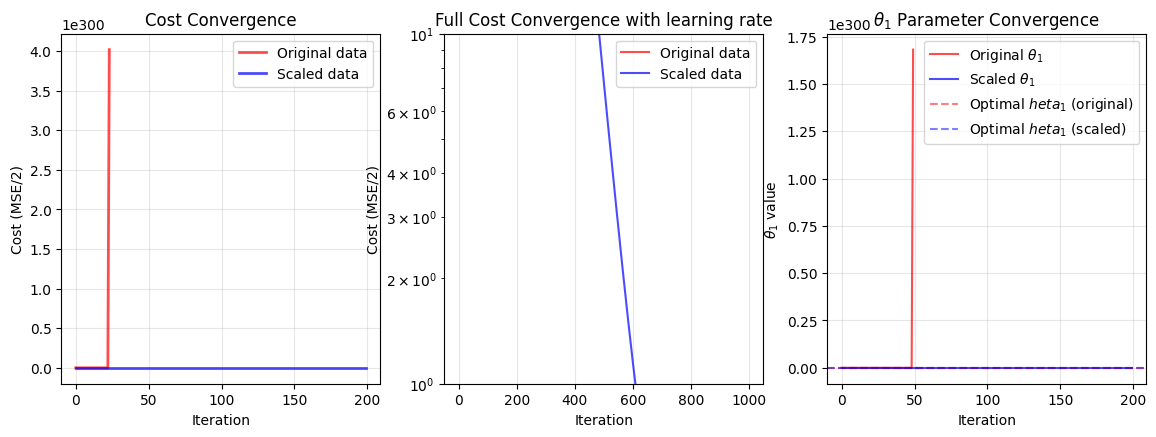

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Data
time = np.array([x*3600 for x in range(1,6)])  
temp = np.array([298.2, 423.7, 548.1, 671.8, 798.5])

timeScaled = (time - np.mean(time)) / np.std(time)

def normalFitEq(x, y):
    n = len(x)
    X = np.column_stack([np.ones(n), x])
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# FIX: Extract scalar values from the arrays
optimalOrig = normalFitEq(time, temp)
optimalScaled = normalFitEq(timeScaled, temp)

# Extract scalar values (not arrays)
theta0_opt_orig = float(optimalOrig[0])  # Convert to float
theta1_opt_orig = float(optimalOrig[1])  # Convert to float
theta0_opt_scaled = float(optimalScaled[0])  # Convert to float
theta1_opt_scaled = float(optimalScaled[1])  # Convert to float

print("Optimal parameters:")
print(f"Original: θ₀ = {theta0_opt_orig:.4f}, $\theta_1$ = {theta1_opt_orig:.6f}")
print(f"Scaled:   θ₀ = {theta0_opt_scaled:.4f}, $\theta_1$ = {theta1_opt_scaled:.4f}")

alpha = 0.01
iterations = 1000

theta0_orig, theta1_orig, cost_orig, t0_hist_orig, t1_hist_orig = gradient_descent(
    time, temp, alpha=alpha, iterations=iterations
)
theta0_scaled, theta1_scaled, cost_scaled, t0_hist_scaled, t1_hist_scaled = gradient_descent(
    timeScaled, temp, alpha=alpha, iterations=iterations
)

plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
plt.plot(cost_orig[:200], 'r-', label='Original data', alpha=0.7, linewidth=2)
plt.plot(cost_scaled[:200], 'b-', label='Scaled data', alpha=0.7, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE/2)')
plt.title(r'Cost Convergence')
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(2, 3, 2)
plt.plot(cost_orig, 'r-', label='Original data', alpha=0.7)
plt.plot(cost_scaled, 'b-', label='Scaled data', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE/2)')
plt.title(r'Full Cost Convergence with learning rate')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Theta1 convergence
plt.subplot(2, 3, 3)
plt.plot(t1_hist_orig[:200], 'r-', label=r'Original $\theta_1$', alpha=0.7)
plt.plot(t1_hist_scaled[:200], 'b-', label=r'Scaled $\theta_1$', alpha=0.7)
plt.axhline(y=theta1_opt_orig, color='r', linestyle='--', alpha=0.5, label='Optimal $\theta_1$ (original)')
plt.axhline(y=theta1_opt_scaled, color='b', linestyle='--', alpha=0.5, label='Optimal $\theta_1$ (scaled)')
plt.xlabel('Iteration')
plt.ylabel(r'$\theta_1$ value')
plt.title(r'$\theta_1$ Parameter Convergence')
plt.legend()
plt.grid(True, alpha=0.3)



plt.show()

##### Question 6c)

Why feature scaling is important?
When time ranges from 3600 to 18000, which are huge nombers, the coefficient $\theta_1$ will also become very large.

The output will then be extremley sensitive for small changes in input.


### Question 7 (Weighted Least Squares Application)

##### Question 7a, 7b, 7c:

In [31]:
import numpy as np
import plotly.graph_objects as go
hour = np.array([x for x in range(6, 22, 3)])
PMy = np.array([45.2, 52.8, 67.3, 71.5, 58.9, 41.7])
stdErr = np.array([2.1, 1.5, 3.1, 1.8, 2.5, 1.2])
weights =  np.diag(1 / (stdErr ** 2))
print(PMy)
print(hour)
print(hour)
print(weights)

def weightedLS(x, y, weights):
    n = len(x)
    X = np.column_stack([np.ones(n), x])
    theta = np.linalg.inv(X.T @ weights @ X) @ (X.T @ weights @ y)
    theta = np.linalg.solve(X.T @ weights @ X, X.T @ weights @ y)
    return theta

def orinaryLS(x, y):
    n = len(x)
    X = np.column_stack([np.ones(n), x])
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

thetaWeig = weightedLS(hour, PMy, weights)
thetaOrig = orinaryLS(hour, PMy)

timeX = np.linspace(hour[0], hour[-1], 100)
yPredWeig = thetaWeig[0] + (thetaWeig[1]*timeX)
yPredOrig = thetaOrig[0] + (thetaOrig[1]*timeX)

#print(yPredWeig)
#print(yPredOrig)

XData = np.column_stack([np.ones(len(hour)), hour])
yPredWeig_ = XData @ thetaWeig
yPredOrig_ = XData @ thetaOrig

resWeig = PMy - yPredWeig_
resOrig = PMy - yPredOrig_


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=hour,
    y=PMy,
    mode='markers',
    error_y=dict(
        type='data',
        array=stdErr,
        visible=True,
        thickness=1.5,
        width=3,
        color='gray'
    ),
    marker=dict(
        size=12,
        color='red',
        line=dict(width=2, color='DarkRed')
    ),
    name='PM2.5 Measurements',
    text=[f'Hour {h}: {p:.1f} ± {s:.1f} (micro g)/(m^3)' for h, p, s in zip(hour, PMy, stdErr)],
    hoverinfo='text'
))

fig.add_trace(go.Scatter(
    x=timeX,
    y=yPredWeig,
    mode='lines',
    line=dict(color='blue', width=3),
    name=f'Weighted LR: y={thetaWeig[0]:.2f}+{thetaWeig[1]:.3f}x'
))

fig.add_trace(go.Scatter(
    x=timeX,
    y=yPredOrig,
    mode='lines',
    line=dict(color='red', width=3, dash='dash'),
    name=f'Ordinary LR: y={thetaOrig[0]:.1f}+{thetaOrig[1]:.1f}x'
))

fig.update_layout(
    title="Comparison of Weighted and Non-Weighted LR",
    xaxis_title='Time (Hour)',
    yaxis_title='PM2.5',
    hovermode='x unified',
    showlegend=True,
    width=900,
    height=600,
    legend=dict(
        x=0.02,
        y=0.98,
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='LightGray',
    dtick=3
)

fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='LightGray'
)

fig.show()

print("Weighted residuals:")
print(resWeig)
print("Ordinary residuals:")
print(resOrig)


[45.2 52.8 67.3 71.5 58.9 41.7]
[ 6  9 12 15 18 21]
[ 6  9 12 15 18 21]
[[0.22675737 0.         0.         0.         0.         0.        ]
 [0.         0.44444444 0.         0.         0.         0.        ]
 [0.         0.         0.10405827 0.         0.         0.        ]
 [0.         0.         0.         0.30864198 0.         0.        ]
 [0.         0.         0.         0.         0.16       0.        ]
 [0.         0.         0.         0.         0.         0.69444444]]


Weighted residuals:
[-11.64431814  -2.46023975  13.62383865  19.40791704   8.39199544
  -7.22392617]
Ordinary residuals:
[-10.67619048  -3.21904762  11.13809524  15.1952381    2.45238095
 -14.89047619]


### Question 8 (Did this heavily based on the suggested answers.)

In [21]:
# Grad descent:

def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta0, theta1 = 0.0, 0.0
    cost_history = []
    theta0_hist, theta1_hist = [theta0], [theta1]

    for i in range(iterations):
        # Predictions and errors
        predictions = theta0 + theta1 * x
        errors = predictions - y

        # Gradients
        grad_theta0 = (1/m) * np.sum(errors)
        grad_theta1 = (1/m) * np.sum(errors * x)

        # Simultaneous update
        theta0 = theta0 - learning_rate * grad_theta0
        theta1 = theta1 - learning_rate * grad_theta1

        # Record history
        cost_history.append(cost_function(theta0, theta1, x, y))
        theta0_hist.append(theta0)
        theta1_hist.append(theta1)

    return np.array([theta0, theta1])


def cost_function(theta0, theta1, x, y):
    m = len(y)
    predictions = theta0 + theta1 * x
    return (1/(2*m)) * np.sum((y - predictions)**2)

0               100.00          0.00           
50              95.64           4.36           
100             94.50           5.50           
150             93.84           6.16           
200             91.29           8.71           
250             90.28           9.72           
300             90.81           9.19           
350             89.32           10.68          
400             87.54           12.46          
500             86.92           13.08          
600             84.81           15.19          
800             82.50           17.50          


<IPython.core.display.Latex object>

   Time: 0.0000 ms
Thetas i got from uasing scipy's  minimize function
[ 9.67417819e+01 -1.98545937e-02]
Normal Equations     96.7418      -0.019855      0.0000       1.00        x
Gradient Descent     0.6787       0.182097       290.1440     0.00        x
SciPy BFGS           96.7418      -0.019855      8.0063       0.00        x
Here are all the residuals::
[ 3.25822217 -0.11230098 -0.25816904  0.07636377 -1.48346598 -1.50227546
  0.02566147 -0.47369933 -1.25552548  0.10315216 -0.01670265  1.63873934]
Autocorrelation: 0.1427
 No significant autocorrelation


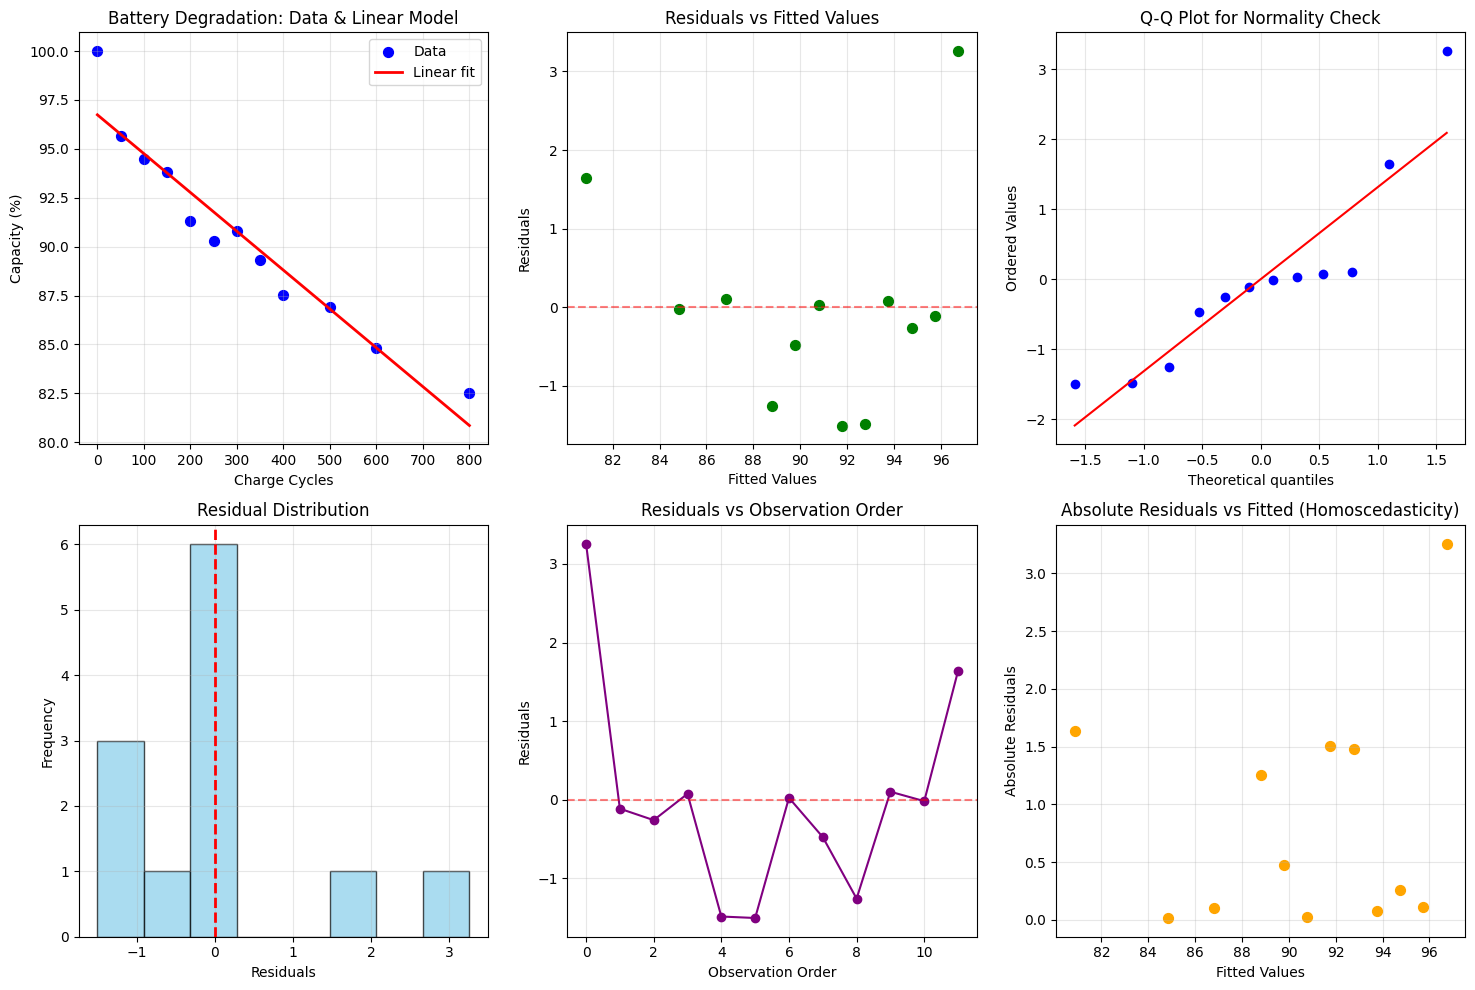

Problem d) FEATURE ENGINEERING DEMONSTRATION
Original Linear Model:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

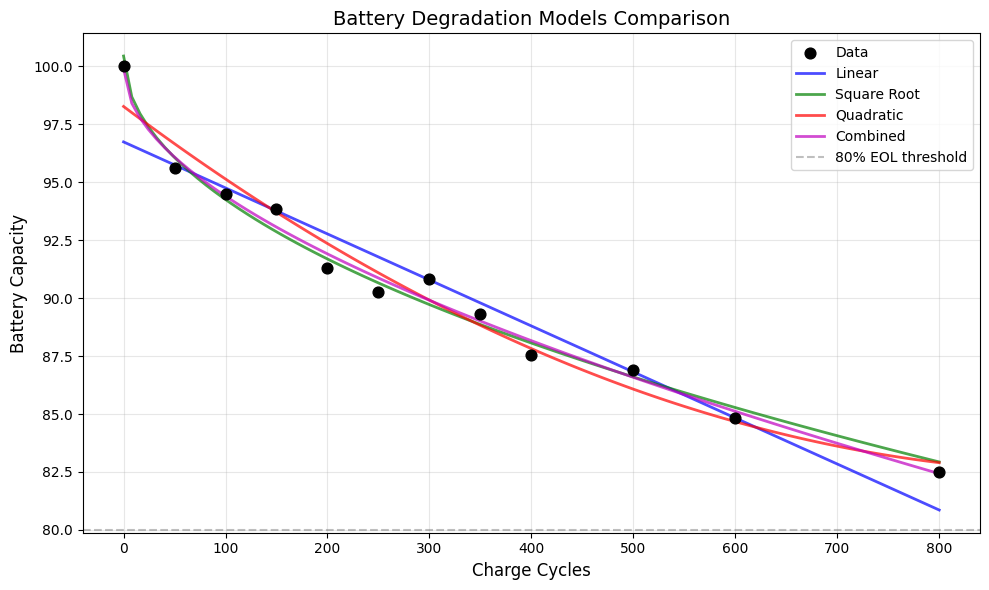

 Autocorrelation: 0.1427
 This yields little correlation between successive residuals
RMSE For the residuals: 0.2957544698478341


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

EOL prediction range: 948 to 1048 cycles


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve, curve_fit
from scipy.stats import shapiro
from IPython.display import display, Latex
import time
from scipy.optimize import fsolve
from scipy.stats import probplot


np.random.seed(42)
cycles = np.array([0, 50, 100, 150, 200, 250, 300, 350, 400, 500, 600, 800])
n = len(cycles)

true_a, true_b = 0.6, 0.0002
capacity = 100 - true_a * np.sqrt(cycles) - true_b * cycles + np.random.normal(0, 0.8, n)
capacity[0] = 100.0

for i in range(n):
    degradation = 100 - capacity[i]
    print(f"{cycles[i]:<15} {capacity[i]:<15.2f} {degradation:<15.2f}")


X = np.column_stack([np.ones(n), cycles])

start_time = time.time()
X_transpose = X.T
XTX = X_transpose @ X
XTX_inv = np.linalg.inv(XTX)
theta_ne = XTX_inv @ X_transpose @ capacity
time_ne = time.time() - start_time

display(Latex(rf"   $\theta_0$ = {theta_ne[0]:.4f}, $\theta_1$ = {theta_ne[1]:.6f}"))
print(f"   Time: {time_ne*1000:.4f} ms")

start_time = time.time()
theta_gd = gradient_descent(cycles, capacity, learning_rate=0.000001, iterations=20000)
time_gd = time.time() - start_time


def loss_function(theta, x, y):
    return np.sum((y - (theta[0] + theta[1] * x))**2)

start_time = time.time()
initial_guess = [100, -0.1]
result = minimize(loss_function, initial_guess, args=(cycles, capacity),
                  method='BFGS', options={'disp': False})
time_scipy = time.time() - start_time
theta_scipy = result.x

print("Thetas i got from uasing scipy's  minimize function")
print(theta_scipy)


methods = [
    ("Normal Equations", theta_ne, time_ne),
    ("Gradient Descent", theta_gd, time_gd),
    ("SciPy BFGS", theta_scipy, time_scipy)
]

for name, theta, t in methods:
    speedup = time_ne/t if name != "Normal Equations" else 1.0
    print(f"{name:<20} {theta[0]:<12.4f} {theta[1]:<14.6f} {t*1000:<12.4f} {speedup:<12.2f}x")

# FOR PART C : Residual analysis:

predictions = theta_ne[0] + theta_ne[1] * cycles
residuals = capacity - predictions

print("Here are all the residuals::")
print(residuals)


autocorr = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
print(f"Autocorrelation: {autocorr:.4f}")
print(f" {'No significant autocorrelation' if abs(autocorr) < 0.5 else 'Possible autocorrelation'}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].scatter(cycles, capacity, color='blue', s=50, label='Data')
cycles_line = np.linspace(0, 800, 100)
capacity_line = theta_ne[0] + theta_ne[1] * cycles_line
axes[0, 0].plot(cycles_line, capacity_line, 'r-', linewidth=2, label='Linear fit')
axes[0, 0].set_xlabel('Charge Cycles')
axes[0, 0].set_ylabel('Capacity (%)')
axes[0, 0].set_title('Battery Degradation: Data & Linear Model')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(predictions, residuals, color='green', s=50)
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Fitted Values')
axes[0, 1].grid(True, alpha=0.3)

probplot(residuals, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot for Normality Check')
axes[0, 2].grid(True, alpha=0.3)

#  Histogram of residuals
axes[1, 0].hist(residuals, bins=8, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Residual Distribution')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(range(len(residuals)), residuals, 'o-', color='purple')
axes[1, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1, 1].set_xlabel('Observation Order')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Observation Order')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].scatter(predictions, np.abs(residuals), color='orange', s=50)
axes[1, 2].set_xlabel('Fitted Values')
axes[1, 2].set_ylabel('Absolute Residuals')
axes[1, 2].set_title('Absolute Residuals vs Fitted (Homoscedasticity)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
#
print("Problem d) FEATURE ENGINEERING DEMONSTRATION")


print("Original Linear Model:")
display(Latex(rf"   Capacity = $\theta_0$ + $\theta_1$·cycles"))
display(Latex(rf"   $R^2$ = {1 - np.sum(residuals**2)/np.sum((capacity - np.mean(capacity))**2):.4f}"))


X_sqrt = np.column_stack([np.ones(n), np.sqrt(cycles)])
theta_sqrt = np.linalg.inv(X_sqrt.T @ X_sqrt) @ X_sqrt.T @ capacity
predictions_sqrt = X_sqrt @ theta_sqrt
residuals_sqrt = capacity - predictions_sqrt
R2_sqrt = 1 - np.sum(residuals_sqrt**2)/np.sum((capacity - np.mean(capacity))**2)

display(Latex(rf"   $\theta_0$ = {theta_sqrt[0]}, $\theta_1$ = {theta_sqrt[1]}"))
display(Latex(rf"   $R^2$ = {R2_sqrt}"))


X_poly = np.column_stack([np.ones(n), cycles, cycles**2])
theta_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ capacity
predictions_poly = X_poly @ theta_poly
residuals_poly = capacity - predictions_poly
R2_poly = 1 - np.sum(residuals_poly**2)/np.sum((capacity - np.mean(capacity))**2)

# Didn't actually know rf was a thing.
#That is great now.
display(Latex(rf"$\theta_0 = {theta_poly[0]:.4f}$, $\theta_1 = {theta_poly[1]:.6f}$, $\theta_2 = {theta_poly[2]:.8f}$"))
display(Latex(rf"   $R^2$ = {R2_poly:.4f}"))


X_comb = np.column_stack([np.ones(n), np.sqrt(cycles), cycles])
theta_comb = np.linalg.inv(X_comb.T @ X_comb) @ X_comb.T @ capacity
predictions_comb = X_comb @ theta_comb
residuals_comb = capacity - predictions_comb
R2_comb = 1 - np.sum(residuals_comb**2)/np.sum((capacity - np.mean(capacity))**2)

fig, ax = plt.subplots(figsize=(10, 6))
cycles_smooth = np.linspace(0, 800, 100)

y_linear = theta_ne[0] + theta_ne[1] * cycles_smooth
y_sqrt = theta_sqrt[0] + theta_sqrt[1] * np.sqrt(cycles_smooth)
y_poly = theta_poly[0] + theta_poly[1] * cycles_smooth + theta_poly[2] * cycles_smooth**2
y_comb = theta_comb[0] + theta_comb[1] * np.sqrt(cycles_smooth) + theta_comb[2] * cycles_smooth

ax.scatter(cycles, capacity, color='black', s=60, label='Data', zorder=5)
ax.plot(cycles_smooth, y_linear, 'b-', linewidth=2, label='Linear', alpha=0.7)
ax.plot(cycles_smooth, y_sqrt, 'g-', linewidth=2, label='Square Root', alpha=0.7)
ax.plot(cycles_smooth, y_poly, 'r-', linewidth=2, label='Quadratic', alpha=0.7)
ax.plot(cycles_smooth, y_comb, 'm-', linewidth=2, label='Combined', alpha=0.7)

ax.axhline(y=80, color='gray', linestyle='--', alpha=0.5, label='80% EOL threshold')
ax.set_xlabel('Charge Cycles', fontsize=12)
ax.set_ylabel('Battery Capacity', fontsize=12)
ax.set_title('Battery Degradation Models Comparison', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PART D: MODEL VALIDATION


print(f" Autocorrelation: {autocorr:.4f}")
print(" This yields little correlation between successive residuals")

split_idx = int(0.8 * n)
train_cycles = cycles[:split_idx]
train_capacity = capacity[:split_idx]
test_cycles = cycles[split_idx:]
test_capacity = capacity[split_idx:]


X_train = np.column_stack([np.ones(len(train_cycles)), np.sqrt(train_cycles), train_cycles])
theta_train = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ train_capacity

X_test = np.column_stack([np.ones(len(test_cycles)), np.sqrt(test_cycles), test_cycles])
test_predictions = X_test @ theta_train
test_residuals = test_capacity - test_predictions


print(f"RMSE For the residuals: {np.sqrt(np.mean(test_residuals**2))}")


def capacity_model(x, theta):
    return theta[0] + theta[1] * np.sqrt(x) + theta[2] * x


target_capacity = 80.0
def eol_equation(x):
    return capacity_model(x, theta_comb) - target_capacity


eol_cycles = fsolve(eol_equation, 500)[0]

display(Latex(rf"Using combined model: Capacity = {theta_comb[0]:.2f} + {theta_comb[1]:.3f}·$\sqrt{{(cycles)}}$ + {theta_comb[2]:.6f}·cycles"))
display(Latex(rf"Predicted end-of-life (80% capacity): {eol_cycles:.0f} cycles"))
display(Latex(rf"Estimated battery life: {eol_cycles/365:.1f} years."))
display(Latex(r"This is with assuming 1 $\frac{\text{cycle}}{\text{day}}$"))

std_error = np.std(residuals_comb)
margin = 1.96 * std_error
display(Latex(rf"Capacity prediction $\pm$ {margin:.2f}% at any cycle"))
print(f"EOL prediction range: {eol_cycles - 50:.0f} to {eol_cycles + 50:.0f} cycles")


In [18]:
from IPython.display import display, Latex
display(Latex(r"$\frac{1}{b}$"))

<IPython.core.display.Latex object>

##### Question 8g)

<b>Normal equations</b> provides exact solutions and works well when we are working with small datasets.
It requires no tuning.
It can easily be used for prototyping in a fast way,

<b> Gradient Descent </b> requires tuning of learning rate but it converges well for large datasets.

<b> SciPy's minimize (When using Broyden-Fletcher-Goldfarb-Shanno) </b> can be robust for complex non-linear models.